In [426]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
from tqdm import tqdm

In [427]:
cuotas = np.array([8.51,10.68,12.24,13.66,15.37,17.15,19.66,24.69])
#cuotas = np.array([2.52,2.59,7.51,7.72,9.14,9.40,27.21,29.97])
#cuotas = np.array([  9.37890625,  17.6859375 ,  17.6859375 ,  17.6859375 ,
#        17.6859375 ,  33.350625  ,  33.350625  ,  33.350625  ,
#        33.350625  ,  33.350625  ,  33.350625  ,  62.88975   ,
#        62.88975   ,  62.88975   ,  62.88975   , 118.5921    ])
cuotas

array([ 8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])

In [428]:
# En pesos
Capital = 1000000

In [429]:
# Funcion a minimizar
def Retorno(w,cuotas):
    Retornos =  Capital * ( w * cuotas - 1. ) 
    # Aca devolvemos el valor más pequeño de ganancia de todas a las apuestas
    # La idea es asegurar ganancia
    #return np.std(Retornos) # Debo minimizar la desviacion / var 
    return np.min(Retornos) # Debo maximizar el valor más perqueño del retorno
    # Maximizar el retorno total: Arriesgada
    #return np.sum(Retornos)
    
    #return np.mean(Retornos)

    # Opcion de penalizacion
    #penalizacion = np.sum(Retornos[Retornos < 0])  # Penaliza los retornos negativos
    #return np.min(Retornos) + penalizacion

In [430]:
def Plotter(e):
    
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.set_title('Learning curve - epoch={:.0f}'.format(e))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Investment return')
    
    
    return ax

In [431]:
class Robot:
    
    def __init__(self,f,cuotas,Id=0,rate=0.01):
        
        self.Id = Id
        # Mutation Rate
        self.rate = rate
        self.Fitness = np.inf

        # Cuotas
        self.cuotas = cuotas
        
        # Funcion a minimizar
        self.f = f
        
        # Espacio de parámetros
        self.r = np.random.uniform(0.,1., size=self.cuotas.shape[0])
        self.r = self.r / np.sum(self.r)  # Normalización inicial
                
    def Mutate(self):
        
        self.r += np.random.normal( loc=0., scale = self.rate, size=self.cuotas.shape[0] )
        self.r = np.abs(self.r)  # Asegura que no haya valores negativos
        self.r = self.r / np.sum(self.r)  # Normaliza para que la suma sea 1
        
    def GetR(self):
        return self.r
    
    def SetFitness(self):   
        self.Fitness = self.f(self.GetR(),self.cuotas)

    def GetFitness(self):
        return self.Fitness

In [432]:
def GetRobots(N):
    
    Robots = []
    
    for i in range(N):
        r = Robot(f=Retorno,cuotas=cuotas,Id=i)
        Robots.append(r)
        
    return Robots

In [433]:
def Genetic(Robots, minimize = True, epochs = 5e2):
    
    
    # Guardamos los mas aptos
    N = int(0.4*len(Robots))
    
    # Mirar la aptitud más pequeña en cada epoca
    Fitness = np.array([])
    
    for e in range(int(epochs)):
          
        # actualizamos informaicíón
        for i,p in enumerate(Robots):
            p.Mutate()
            p.SetFitness()
        
        #clear_output(wait=True)
              
        # Ordenamos los robots por fitness
        scores = [ (p.Fitness, p) for p in Robots ]
        
        if minimize:
            scores.sort(key = lambda x: x[0], reverse = False) # De menor a mayor
        else:
            scores.sort(key = lambda x: x[0], reverse = True)  # De mayor a menor
        
        # Tomamos lo incides hasta el % porciento
        Temp = [r[1] for i,r in enumerate(scores) if i < N ]
        
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])
        
         
        # Miramos el fitness de cada robot
        Fitness_ = [  r.GetFitness() for i,r in enumerate(Robots) ]
 
        # Guardamos la aptitud promedio
        Fitness = np.append(Fitness,np.mean(Fitness_))
        
        
        #ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(-0.2,0.9),frameon=False,fontsize=10)
        if e % 50 == 0:
            clear_output(wait=True)

           # print(Fitness)
            
            # Imagen para pintar
            ax = Plotter(e)
            
            # Funcion de Fitness
            ax.plot(Fitness,color='k',label='Fitness: {:.2f}'.format(Fitness[-1]))
            ax.legend(loc=0)

            plt.tight_layout()
            
            plt.show()

        
        if e == epochs - 1:
            ax = Plotter(e+1)          
            ax.plot(Fitness,color='k',label='Fitness: {:.2f}'.format(Fitness[-1]))
            ax.legend(loc=0)
            plt.tight_layout()
            plt.savefig('Retorno.pdf')
            plt.close()

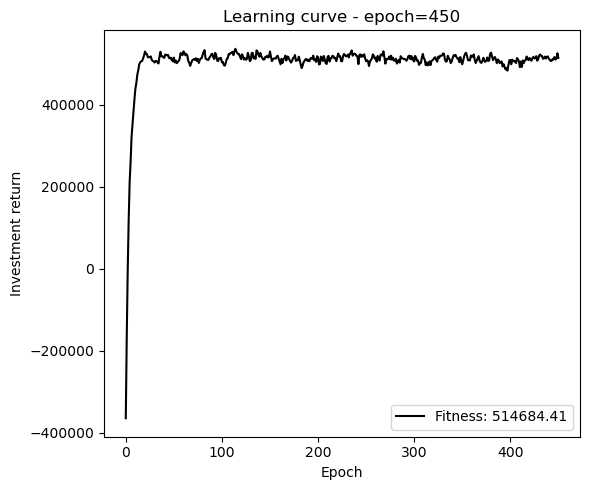

In [434]:
Robots = GetRobots(200)
Genetic(Robots, minimize=False)

In [444]:
Fitness = np.array([ p.GetFitness() for i, p in enumerate(Robots)])#.mean(axis=0)
#Fitness

In [445]:
params = np.array([ p.GetR() for i, p in enumerate(Robots)]).mean(axis=0)
np.round(params,3)

array([0.19 , 0.157, 0.139, 0.126, 0.111, 0.107, 0.092, 0.079])

In [446]:
cuotas

array([ 8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69])

In [447]:
# Ganancias posibles con ese conjunto de pesos
Ganancias = Capital*( params * cuotas - 1 )
Ganancias

array([615206.01094396, 673194.79632287, 702433.17614484, 722054.25251058,
       705752.4049287 , 828750.90647085, 806442.88318506, 947634.07509146])

In [448]:
# Cuota nota
1 + Ganancias/Capital

array([1.61520601, 1.6731948 , 1.70243318, 1.72205425, 1.7057524 ,
       1.82875091, 1.80644288, 1.94763408])

In [449]:
Apuestas = Capital*params
Apuestas

array([189800.94135652, 156666.17943098, 139087.67778961, 126065.4650447 ,
       110979.33669022, 106632.70591667,  91884.17513657,  78883.51863473])